<a href="https://colab.research.google.com/github/Megs130805/machine-learning/blob/main/ML%20PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/plant_village_datatset/archive (7)/PlantVillage/'


In [ ]:
import os

print(os.listdir(dataset_path))



['Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_Septoria_leaf_spot', 'Tomato__Target_Spot', 'Tomato_Leaf_Mold', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Late_blight', 'Tomato_Early_blight', 'Tomato_Bacterial_spot', 'Tomato_healthy', 'Potato___healthy', 'Potato___Late_blight', 'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight']


In [ ]:
!cp -r "/content/drive/MyDrive/Colab Notebooks/plant_village_datatset/archive (7)/PlantVillage/" /content/
dataset_path = "/content/PlantVillage/"



In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
import os
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator




In [ ]:
original_dir = "/content/PlantVillage/"
test_dir = "/content/PlantVillage_test/"

os.makedirs(test_dir, exist_ok=True)


In [ ]:
for class_name in os.listdir(original_dir):
    class_path = os.path.join(original_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    random.shuffle(images)
    n_test = int(0.1 * len(images))  # 10% of images

    test_images = images[:n_test]

    # create class folder in test_dir
    test_class_dir = os.path.join(test_dir, class_name)
    os.makedirs(test_class_dir, exist_ok=True)

    # move images to test folder
    for img in test_images:
        shutil.move(os.path.join(class_path, img), os.path.join(test_class_dir, img))


In [ ]:
img_size = (224, 224)
batch_size = 32

# Train + Validation
train_val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.125  # ~12.5% of remaining images for validation
)

train_generator = train_val_datagen.flow_from_directory(
    original_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='training',
    color_mode='rgb'
)

val_generator = train_val_datagen.flow_from_directory(
    original_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='validation',
    color_mode='rgb'
)

# Test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False
)



Found 16262 images belonging to 15 classes.
Found 2318 images belonging to 15 classes.
Found 2058 images belonging to 15 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Load pretrained MobileNetV2 without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # Freeze base layers for feature extraction

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Complete model
model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 258s 475ms/step - accuracy: 0.5801 - loss: 1.3370 - val_accuracy: 0.8361 - val_loss: 0.4970
Epoch 2/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 216s 425ms/step - accuracy: 0.8062 - loss: 0.5748 - val_accuracy: 0.8499 - val_loss: 0.4195
Epoch 3/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 214s 420ms/step - accuracy: 0.8323 - loss: 0.5005 - val_accuracy: 0.8645 - val_loss: 0.3775
Epoch 4/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 214s 420ms/step - accuracy: 0.8511 - loss: 0.4422 - val_accuracy: 0.8796 - val_loss: 0.3596
Epoch 5/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 215s 422ms/step - accuracy: 0.8580 - loss: 0.4114 - val_accuracy: 0.8788 - val_loss: 0.3550
Epoch 6/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 214s 421ms/step - accuracy: 0.8654 - loss: 0.3901 - val_accuracy: 0.8891 - val_loss: 0.3319
Epoch 7/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 214s 420ms/step - accuracy: 0.8643 - loss: 0.3868 - val_accuracy: 0.9012 - val_loss: 0.2914
Epoch 8/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 214s 420ms/step - accuracy: 0.8799 -

In [ ]:
# Unfreeze last 50 layers for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-50]:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)



In [ ]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc*100:.2f}%")



65/65 ━━━━━━━━━━━━━━━━━━━━ 14s 220ms/step - accuracy: 0.9293 - loss: 0.2038
Test Accuracy: 91.21%


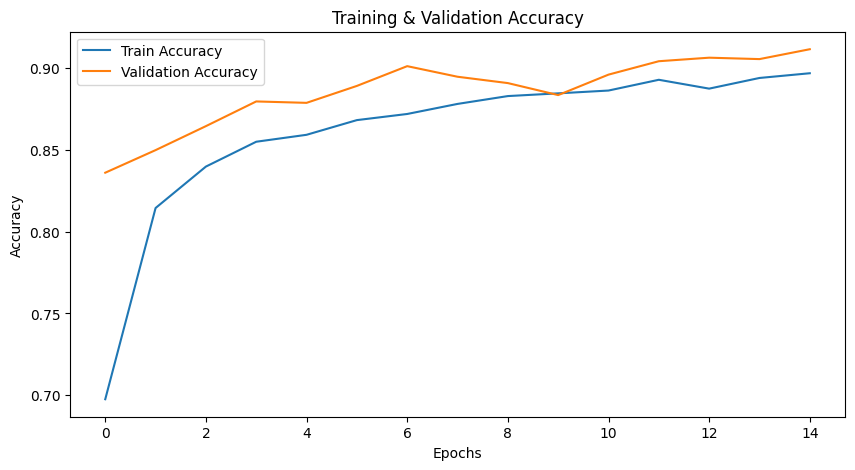

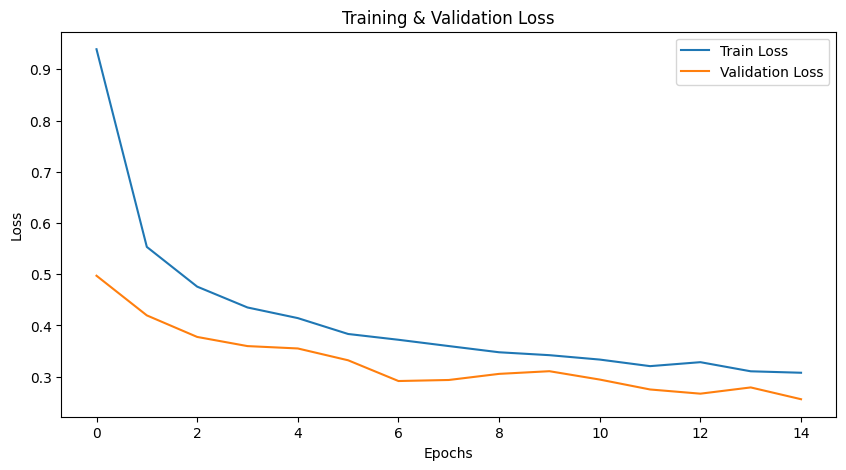

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Optional: plot loss as well
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
model.save('/content/plant_disease_mobilenet_color.h5')
# Optional: copy to Drive
!cp /content/plant_disease_mobilenet_color.h5 "/content/drive/MyDrive/Colab Notebooks/"
